<a href="https://colab.research.google.com/github/DeepankJain/EDA-Reports/blob/master/Chipotle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Dataset: Chipotle

---

Step 2: Objective: Various operations on the given resturant dataset

In [0]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [2]:
#loading the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep = '\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
df.shape

(4622, 5)

In [4]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [6]:
df.index

RangeIndex(start=0, stop=4622, step=1)

In [9]:
#Most ordered item
var = df.groupby('item_name').sum()
var = var.sort_values(['quantity'], ascending = False)
var.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [13]:
#How many items were ordered in total?
total = df['quantity'].sum()
print(total)

4972


In [15]:
#Turn the item price into a float
convertFloat = lambda x: float(x[1:-1])
df['item_price'] = df['item_price'].apply(convertFloat)
print(df.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


In [17]:
#Calculate the revenue for the period?
revenue = (df['quantity']*df['item_price']).sum()
print(revenue)

39237.02


In [21]:
#How many orders were made in the period?
orderCount = df['order_id'].value_counts().count()
print(orderCount)

1834


In [22]:
#Average amount per order?
print(revenue/orderCount)

21.39423118865867


In [23]:
#How many different items are sold?
df['item_name'].value_counts().count()

50

In [25]:
#What is the price of each item.
df_filtered = df.drop_duplicates(['item_name', 'quantity'])
df_filtered['price_per_unit'] = df_filtered['item_price']/df_filtered['quantity']
catalog = df_filtered[['item_name', 'price_per_unit']]
print(catalog.sort_values(by = 'price_per_unit', ascending = False))

                                  item_name  price_per_unit
606                        Steak Salad Bowl           11.89
1132                    Carnitas Salad Bowl           11.89
1229                    Barbacoa Salad Bowl           11.89
281                        Steak Salad Bowl           11.89
168                   Barbacoa Crispy Tacos           11.75
39                            Barbacoa Bowl           11.75
7                             Steak Burrito           11.75
3480                          Carnitas Bowl           11.75
506                           Carnitas Bowl           11.75
135                      Chicken Salad Bowl           11.25
62                              Veggie Bowl           11.25
57                           Veggie Burrito           11.25
186                       Veggie Salad Bowl           11.25
3601                         Veggie Burrito           11.25
738                       Veggie Soft Tacos           11.25
250                           Chicken Sa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#Sort by the name of the item
df_filtered['item_name'].sort_values()

298         6 Pack Soft Drink
3389        6 Pack Soft Drink
39              Barbacoa Bowl
21           Barbacoa Burrito
1903    Barbacoa Crispy Tacos
168     Barbacoa Crispy Tacos
1229      Barbacoa Salad Bowl
56        Barbacoa Soft Tacos
2441            Bottled Water
4152            Bottled Water
818             Bottled Water
540             Bottled Water
1425            Bottled Water
3599            Bottled Water
34              Bottled Water
445                      Bowl
673                      Bowl
510                   Burrito
18                Canned Soda
2235              Canned Soda
28                Canned Soda
263         Canned Soft Drink
3973        Canned Soft Drink
492         Canned Soft Drink
689         Canned Soft Drink
33              Carnitas Bowl
3480            Carnitas Bowl
506             Carnitas Bowl
2581         Carnitas Burrito
27           Carnitas Burrito
                ...          
520              Crispy Tacos
1                        Izze
2         

In [27]:
#Quantity of the most expensive item?
df_filtered.sort_values(by = 'price_per_unit', ascending = False).head()

,order_id,quantity,item_name,choice_description,item_price,price_per_unit
606,250,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Pinto Beans, Cheese, Gua...",11.89,11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75,11.75


In [28]:
#How many times were Veggie Salad Bowl ordered?
veggie_salad = df[df['item_name'] == 'Veggie Salad Bowl']
len(veggie_salad)

18

In [29]:
#How many times people ordered more than one canned Soda?
cannedSoda = df[(df['item_name'] == 'Canned Soda') & (df['quantity']>1)]
print(len(cannedSoda))

20


In [30]:
#checking for missing values
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [0]:
df.drop('choice_description', axis = 1, inplace = True)

In [32]:
df.head()

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98


In [33]:
#Univariate Analysis
#Non graphical
df.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [35]:
df.describe(include = ['object'])

,item_name
count,4622
unique,50
top,Chicken Bowl
freq,726


In [36]:
#Count the datapoints
df['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

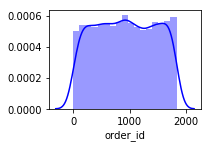

In [40]:
#Graphical
#histogram of independent attributes
plt.subplot(221)
sns.distplot(df['order_id'], color = 'b')


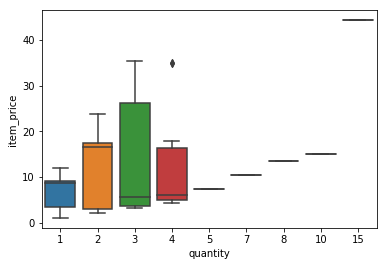

In [46]:
sns.boxplot(x = 'quantity', y = 'item_price',data = df)

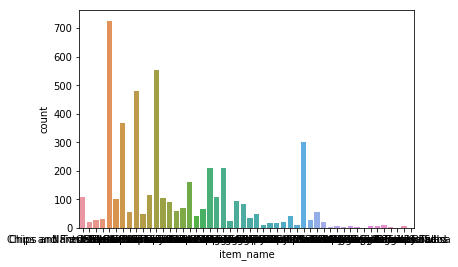

In [47]:
#Bar plot
sns.countplot(df['item_name'])

In [48]:
#Bivariate Analysis
#Contingency Table
pd.crosstab(df['quantity'], df['item_name'])

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
quantity,,,,,,,,,,,,,,,,,,,,,
1,53,66,91,10,10,25,139,1,6,84,...,34,4,27,54,83,94,1,6,18,6
2,1,0,0,1,0,0,12,0,0,19,...,1,0,2,1,2,0,0,0,0,1
3,0,0,0,0,0,0,6,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
numerical = ['order_id', 'item_price', 'quantity']
categorical = ['item_name']

In [51]:
#Correlation matrix
corr_matrix = df[numerical].corr()
print(corr_matrix)

            order_id  item_price  quantity
order_id    1.000000   -0.001618  0.032397
item_price -0.001618    1.000000  0.263981
quantity    0.032397    0.263981  1.000000


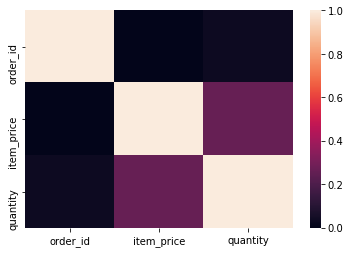

In [52]:
sns.heatmap(corr_matrix)

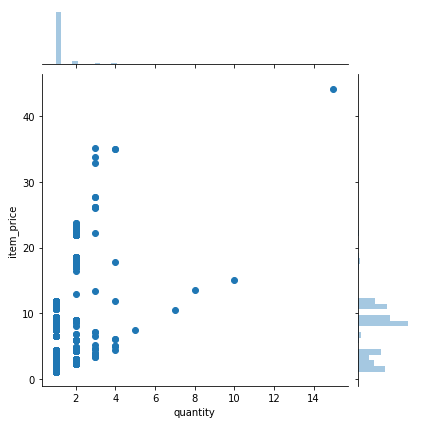

In [53]:
#Scatter Plot
sns.jointplot(x = 'quantity', y ='item_price', data = df, kind = 'scatter')

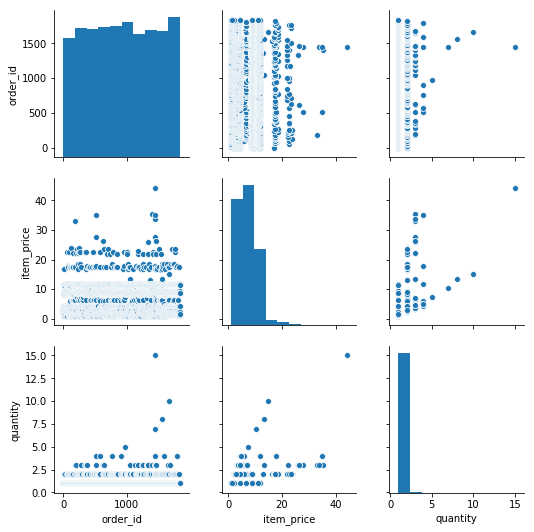

In [55]:
#Pair Plot
sns.pairplot(df[numerical])
plt.show()